In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import folium

In [71]:
#importer les données
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [72]:
print(confirmed_df.shape)
print(recovered_df.shape)
print(deaths_df.shape)
print(country_df.shape)

(281, 753)
(266, 753)
(281, 753)
(197, 16)


In [73]:
confirmed_df.head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,162111,162926,163555,164190,164727,165358,165711,166191,166924,167739
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,255741,258543,258543,261240,261240,263172,263172,264624,264875,265716
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,250774,252117,253520,254885,255836,256806,257598,257976,258478,259088
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,35556,35958,35958,36315,36470,36599,36599,36599,36808,36808
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,98076,98116,98226,98267,98319,98340,98351,98364,98409,98424
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,6558,6627,6627,6732,6732,6732,6732,6853,6853,6853
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,8335184,8378656,8427778,8472848,8515285,8555379,8577215,8589879,8615285,8648075
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,366433,367795,370922,374878,379266,383458,387490,389957,391588,394074
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,36031,36474,37023,37426,37875,38143,38432,38698,38698,39613
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,1139787,1086483,1098290,1110567,1121265,1129418,1137311,1144748,1154133,1164346


In [74]:
country_df.head(20)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Cases_28_Days,Deaths_28_Days
0,Afghanistan,2022-02-09 17:21:06,33.939110,67.709953,168550,7465,NaN,NaN,432.975040,NaN,NaN,4.428953,4,AFG,9268,80
1,Albania,2022-02-09 17:21:06,41.153300,20.168300,265716,3393,NaN,NaN,9233.303218,NaN,NaN,1.276927,8,ALB,43052,146
2,Algeria,2022-02-09 17:21:06,28.033900,1.659600,259088,6667,NaN,NaN,590.836574,NaN,NaN,2.573257,12,DZA,35892,304
3,Andorra,2022-02-09 17:21:06,42.506300,1.521800,36808,147,NaN,NaN,47638.646218,NaN,NaN,0.399370,20,AND,8266,6
4,Angola,2022-02-09 17:21:06,-11.202700,17.873900,98424,1896,NaN,NaN,299.468136,NaN,NaN,1.926359,24,AGO,7276,56
5,Antigua and Barbuda,2022-02-09 17:21:06,17.060800,-61.796400,6853,131,NaN,NaN,6997.998530,NaN,NaN,1.911572,28,ATG,1795,11
6,Argentina,2022-02-09 17:21:06,-38.416100,-63.616700,8648075,123227,NaN,NaN,19134.697032,NaN,NaN,1.424907,32,ARG,2114440,5632
7,Armenia,2022-02-09 17:21:06,40.069100,45.038200,396885,8108,NaN,NaN,13393.643566,NaN,NaN,2.042909,51,ARM,47850,96
8,Australia,2022-02-09 17:21:06,-25.000000,133.000000,2811482,4373,NaN,NaN,11042.871676,NaN,NaN,0.155541,36,AUS,1587885,1908
9,Austria,2022-02-09 17:21:06,47.516200,14.550100,2149623,14293,NaN,NaN,23867.727394,NaN,NaN,0.664907,40,AUT,749573,399


In [75]:
country_df[country_df['Country_Region']== 'France']

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Cases_28_Days,Deaths_28_Days
62,France,2022-02-09 17:21:06,46.2276,2.2137,21176519,134609,NaN,NaN,32454.513339,NaN,NaN,0.635652,250,FRA,8493820,7561


In [76]:
recovered_df.head(30)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
#identifier les colonnes
country_df.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3', 'Cases_28_Days',
       'Deaths_28_Days'],
      dtype='object')

In [78]:
# supprimer les colonnes inutiles pour afficher les stats au niveau mondial
global_data= country_df.copy().drop(['Country_Region','Last_Update', 'Lat', 'Long_', 'Active', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3', 'Cases_28_Days',
       'Deaths_28_Days'], axis=1)
global_synthese= pd.DataFrame(global_data.sum()).transpose()
global_synthese

,Confirmed,Deaths,Recovered
0,402064265.0,5768921.0,0.0


In [79]:
#classer les pays selon le nombre de cas confirmés pour les afficher de manière décroissante
country_conf_class_df = country_df.sort_values('Confirmed', ascending=False)

In [80]:
px.bar(
    country_conf_class_df.head(10),
    x= 'Country_Region',
    y= 'Confirmed',
    title = 'Les 10 pays les plus touchés par le Covid 10 (cas confirmés)',
    color_discrete_sequence= ['pink'],
    height=500,
    width=800
)

In [81]:
country_death_class_df = country_df.sort_values('Deaths', ascending=False)

In [82]:
px.bar(
    country_death_class_df.head(20),
    x= 'Country_Region',
    y= 'Deaths',
    title = 'Les 20 pays les plus touchés par le Covid 10 (cas décès)',
    color_discrete_sequence= ['blue'],
    height=500,
    width=800
)

In [83]:
confirmed_df.isna().sum()

Province/State    194
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
2/4/22              0
2/5/22              0
2/6/22              0
2/7/22              0
2/8/22              0
Length: 753, dtype: int64

In [84]:
confirmed_df= confirmed_df.dropna(subset=['Lat','Long'], axis=0)

In [96]:
#Visualiser les cas confirmés sur une carte
m=folium.Map(location=[46.2276,2.2137],zoom_start=6, max_zoom=12, min_zoom=2)
for i in range(0,len(confirmed_df)):
    folium.Circle(
    location=[confirmed_df.iloc[i]['Lat'], confirmed_df.iloc[i]['Long']],
    fill=True,
    radius=(int((np.log(confirmed_df.iloc[i,-1]+1.0001)))+0.2)*50000,
    color='red',
    fill_color='indigo',
    tooltip= "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+confirmed_df.iloc[i]['Country/Region'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirme: "+str(confirmed_df.iloc[i,-1])+"</li>"+
                        "<li>Deces:   "+str(deaths_df.iloc[i,-1])+"</li>"+
                        "<li>Taux de mortalite: "+ str(np.round(deaths_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(m)

m

In [86]:
deaths_df.isna().sum()

Province/State    194
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
2/4/22              0
2/5/22              0
2/6/22              0
2/7/22              0
2/8/22              0
Length: 753, dtype: int64

In [87]:
deaths_df= deaths_df.dropna(subset=['Lat','Long'], axis=0)

In [88]:
m=folium.Map(location=[46.2276,2.2137],zoom_start=6, max_zoom=12, min_zoom=2)
for i in range(0,len(deaths_df)):
    folium.Circle(
    location=[deaths_df.iloc[i]['Lat'], deaths_df.iloc[i]['Long']],
    fill=True,
    radius=(int((np.log(deaths_df.iloc[i,-1]+1.0001)))+0.2)*50000,
    color='red',
    fill_color='indigo',
    tooltip= "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+deaths_df.iloc[i]['Country/Region'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirme: "+str(confirmed_df.iloc[i,-1])+"</li>"+
                        "<li>Deces:   "+str(deaths_df.iloc[i,-1])+"</li>"+
                        "<li>Taux de mortalite: "+ str(np.round(deaths_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
    ).add_to(m)

m

In [89]:
country_df[country_df['Country_Region']== 'China']

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Cases_28_Days,Deaths_28_Days
36,China,2022-02-09 17:21:06,30.5928,114.3055,121890,4849,NaN,NaN,8.633789,NaN,NaN,3.978177,156,CHN,4813,0


In [90]:
country_df[country_df['Country_Region']== 'Sweden']

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Cases_28_Days,Deaths_28_Days
169,Sweden,2022-02-09 17:21:06,60.1282,18.6435,2372637,16358,NaN,NaN,23493.153466,NaN,NaN,0.689444,752,SWE,867164,813


In [104]:
#créer un subdataframe pour le pays France
confirmed_fr=confirmed_df[confirmed_df['Country/Region']=='France']
deaths_fr=deaths_df[deaths_df['Country/Region']=='France']
recovered_fr=recovered_df[recovered_df['Country/Region']=='France']


In [105]:
# préparer les données: supprimer les colonnes inutiles
confirmed_fr=confirmed_fr.copy().drop(['Province/State','Country/Region', 'Lat', 'Long'],axis=1).sum()
deaths_fr=deaths_fr.copy().drop(['Province/State','Country/Region', 'Lat', 'Long'],axis=1).sum()
recovered_fr=recovered_fr.copy().drop(['Province/State','Country/Region', 'Lat', 'Long'],axis=1).sum()

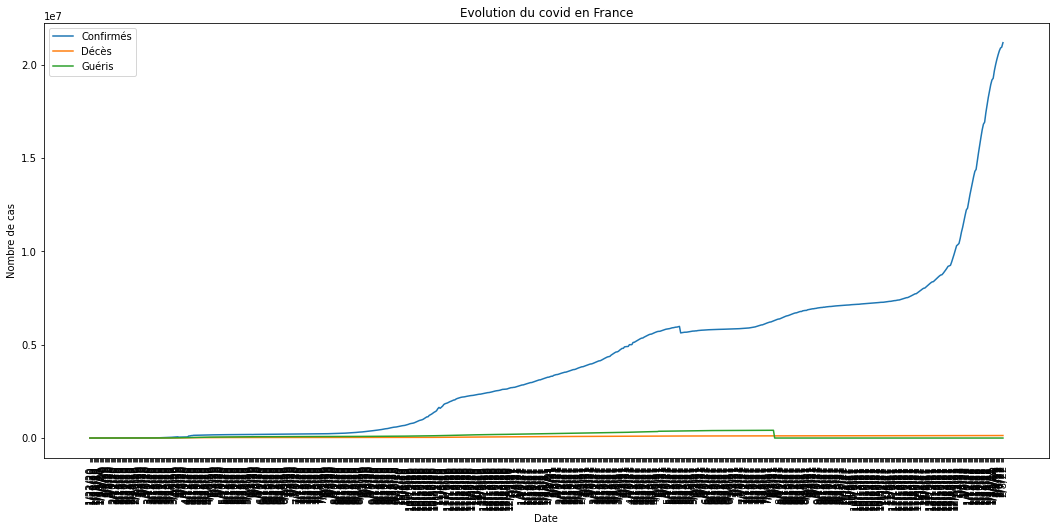

In [106]:
#mise en forme courbe
fig,ax=plt.subplots(figsize=(18, 8))
ax.plot(confirmed_fr.index,confirmed_fr.values, label='Confirmés')
ax.plot(deaths_fr.index,deaths_fr.values, label='Décès')
ax.plot(recovered_fr.index,recovered_fr.values, label='Guéris')

plt.xticks(rotation='vertical')
ax.set(xlabel='Date', ylabel= 'Nombre de cas', title='Evolution du covid en France')
plt.legend()

In [97]:
confirmed_fr.values

array([       0,        0,        2,        3,        3,        3,
              4,        5,        5,        5,        6,        6,
              6,        6,        6,        6,        6,       11,
             11,       11,       11,       11,       11,       11,
             12,       12,       12,       12,       12,       12,
             12,       12,       12,       12,       14,       18,
             38,       57,      100,      130,      191,      212,
            288,      426,      616,      948,     1125,     1411,
           1783,     2293,     2293,     3681,     4496,     4532,
           6683,     7715,     9124,    10970,    12758,    14463,
          16761,    20120,    22372,    25331,    29252,    33045,
          37693,    40296,    44645,    52281,    57125,    59227,
          64452,    47376,    48225,    50884,    47395,    51250,
          55034,    56600,    58045,   108792,   111933,   129381,
         132588,   145166,   147057,   150861,   151955,   154

In [101]:
deaths_fr.values

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            1,      1,      1,      1,      1,      1,      1,      1,
            1,      1,      1,      2,      2,      2,      2,      2,
            3,      4,      4,      7,      9,     16,     19,     25,
           33,     48,     48,     79,     91,     91,    149,    149,
          149,    244,    451,    563,    676,    862,   1102,   1333,
         1697,   1996,   2314,   2608,   3025,   3526,   4779,   5388,
         6510,   7562,   8081,   8914,  10330,  10874,  12214,  13199,
        13835,  14396,  14969,  15712,  17150,  17903,  18664,  19305,
        19694,  20241,  20769,  21313,  21829,  22218,  22587,  22830,
        23267,  23634,  24060,  24349,  24566,  24763,  24898,  25204,
        25537,  25812,  25991,  26233,  26313,  26383,  26646,  26994,
      